In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('default')

1. Imputation
2. Handling Outliers
3. Categorical Encoding
4. Feature Splitting
5. Variable Transformation
6. Descritization or Binning
7. Feature Scalling
8. Feature Creation

In [43]:
dataA = pd.read_csv("D:\\PROGRAMMING\\Datasets\\titanic.csv")
dataA.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
dataA.shape

(891, 12)

In [45]:
dataA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


1) Imputation

In [46]:
##Checking for the missing values
dataA.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [47]:
(dataA.isna().mean() * 100).round(2)
#As there are more than 70% missing values in the Cabin attribute so we will drop the column

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [48]:
dataA.drop("Cabin", axis=1, inplace=True)#inplace true ensure Cabin remove directly from dataA 

In [49]:
##Numerical Imputation
dataA["Age"] = dataA["Age"].fillna(dataA["Age"].mean())
dataA["Age"].isna().sum()

0

In [50]:
##Categorical Imputation
#Filling the missing values with most occuring values
dataA["Embarked"] = dataA["Embarked"].fillna(dataA["Embarked"].mode()[0])

In [51]:
dataA.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

2) Handling Outliers

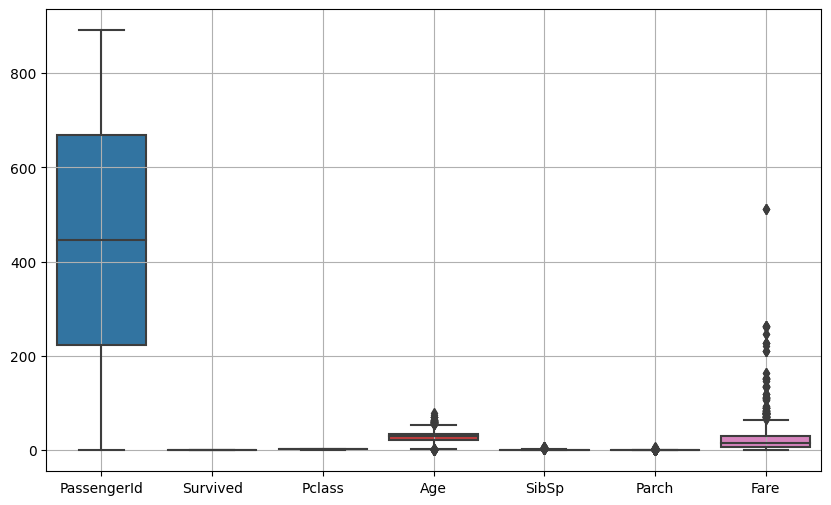

In [52]:
plt.figure(figsize=(10, 6))
cols = dataA.select_dtypes(exclude='object').columns
sb.boxplot(data = dataA[cols])
plt.grid()
plt.show()

In [53]:
q1 = dataA["Fare"].quantile(0.25)
q3 = dataA["Fare"].quantile(0.75)
iqr = q3-q1
lower_extreme = q1-1.5*iqr
upper_extreme = q3 + 1.5*iqr

In [54]:
##Defining the outliers
outliers = dataA[(dataA["Fare"] < lower_extreme) | (dataA["Fare"] > upper_extreme)]
outliers.shape[0]

116

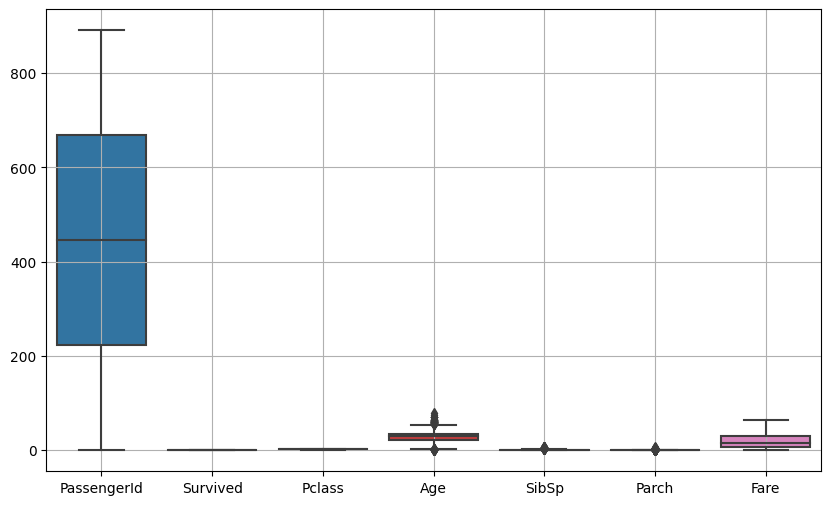

In [55]:
##Replacing the outlier with the mean()
dataA.loc[dataA["Fare"] < lower_extreme, 'Fare'] = dataA["Fare"].mean()
dataA.loc[dataA["Fare"] > upper_extreme, 'Fare'] = dataA["Fare"].mean()

plt.figure(figsize=(10, 6))
cols = dataA.select_dtypes(exclude="object").columns
sb.boxplot(data = dataA[cols])
plt.grid()
plt.show()

3) Categorical Encoding

In [56]:
## -> Ordinal Encoding

ordinal_mapping = {
    1 : 'First_Class',
    2 : 'Second_Class',
    3 : 'Third_Class'
}

dataA["Pclass"] = dataA['Pclass'].replace(ordinal_mapping)
dataA.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,Third_Class,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250000,S
1,2,1,First_Class,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,32.204208,C
2,3,1,Third_Class,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925000,S


In [57]:
## -> Lable Encoding
dataA["Sex"] = np.where(dataA["Sex"]=="male", 1, 0)

dataA.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,Third_Class,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.250000,S
1,2,1,First_Class,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,32.204208,C
2,3,1,Third_Class,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.925000,S


In [58]:
## -> One hot encoding
dataA = pd.get_dummies(dataA, columns=["Embarked"]).replace({True: 1, False: 0})
dataA.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,Third_Class,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.250000,0,0,1
1,2,1,First_Class,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,32.204208,1,0,0
2,3,1,Third_Class,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.925000,0,0,1


4) Descritization / Binning

In [59]:
def group_age(a):
    if(a>0 and a<=12):
        return "Child"
    elif(a>12 and a<=19):
        return "Teen"
    elif(a>19 and a<=59):
        return "Adult"
    else:
        return "Senior"
        

In [60]:
def fare_category(a):
    if(a < 10):
        return "Low_fare"
    elif(a > 10 and a < 30):
        return "Medium_fare"
    else:
        return "High_fare"

In [61]:
dataA.loc[:, "Age_groups"] = dataA["Age"].apply(group_age)
dataA.loc[:, "Fare_Range"] = dataA["Fare"].apply(fare_category)

In [62]:
# dataA['Age_bin'] = pd.cut(dataA['Age'], bins=[0, 18, 30, 50, np.inf], labels=['Child', 'Young Adult', 'Adult', 'Elderly'])
# dataA['Fare_bin'] = pd.qcut(dataA['Fare'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

In [63]:
print(dataA["Age_groups"].value_counts())
print()
print(dataA["Fare_Range"].value_counts())

Age_groups
Adult     701
Teen       95
Child      69
Senior     26
Name: count, dtype: int64

Fare_Range
Low_fare       336
Medium_fare    315
High_fare      240
Name: count, dtype: int64


5) Feature Splitting

In [64]:
dataA["Age"] = dataA["Age"].astype(int)
dataA["Fare"] = dataA["Fare"].round(2)
dataA.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,Age_groups,Fare_Range
0,1,0,Third_Class,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.25,0,0,1,Adult,Low_fare
1,2,1,First_Class,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,32.20,1,0,0,Adult,High_fare
2,3,1,Third_Class,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.92,0,0,1,Adult,Low_fare
3,4,1,First_Class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.10,0,0,1,Adult,High_fare


> Sex can be splitted into binary features i.e., "IsMale" & "IsFemale"

> Embarked can also be splitted into the features i.e., "Embark_C" & "Embark_Q" & "Embark_S"

> Fare_Range can also be splitted into features i.e., "IsLowFare" & "IsMediumFare" & "IsHighFare"

In [65]:
dataA["IsChild"] = dataA["Age_groups"].apply(lambda x: 1 if x=="Child" else 0)
dataA["IsTeen"] = dataA["Age_groups"].apply(lambda x: 1 if x=="Teen" else 0)
dataA["IsAdult"] = dataA["Age_groups"].apply(lambda x: 1 if x=="Adult" else 0)
dataA["IsSenior"] = dataA["Age_groups"].apply(lambda x: 1 if x=="Senior" else 0)
dataA.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,Age_groups,Fare_Range,IsChild,IsTeen,IsAdult,IsSenior
0,1,0,Third_Class,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.25,0,0,1,Adult,Low_fare,0,0,1,0
1,2,1,First_Class,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,32.20,1,0,0,Adult,High_fare,0,0,1,0
2,3,1,Third_Class,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.92,0,0,1,Adult,Low_fare,0,0,1,0
3,4,1,First_Class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.10,0,0,1,Adult,High_fare,0,0,1,0


6) Variable Transformation

In [66]:
dataA['Title'] = dataA['Name'].str.extract('([A-Za-z]+)\.', expand=False)
# Here ' ' Matches space character before title, [A-Za-z] matches all upper lower case letters
# square brackets define class that contains all the upper case and lower case letters
# [A-Za-z]+ quatifier means it should match one or more of these letters
# \. has a special meaning and treated as a literal charachter
dataA.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,Age_groups,Fare_Range,IsChild,IsTeen,IsAdult,IsSenior,Title
0,1,0,Third_Class,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.25,0,0,1,Adult,Low_fare,0,0,1,0,Mr
1,2,1,First_Class,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,32.20,1,0,0,Adult,High_fare,0,0,1,0,Mrs
2,3,1,Third_Class,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.92,0,0,1,Adult,Low_fare,0,0,1,0,Miss


7) Scalling

In [67]:
from sklearn.preprocessing import StandardScaler

##Select the numerical attributes for the standard scalling

numerical_cols = ['Fare']

scaler = StandardScaler()

dataA[numerical_cols] = scaler.fit_transform(dataA[numerical_cols])

dataA

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,Age_groups,Fare_Range,IsChild,IsTeen,IsAdult,IsSenior,Title
0,1,0,Third_Class,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,-0.918474,0,0,1,Adult,Low_fare,0,0,1,0,Mr
1,2,1,First_Class,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,0.923032,1,0,0,Adult,High_fare,0,0,1,0,Mrs
2,3,1,Third_Class,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,-0.869022,0,0,1,Adult,Low_fare,0,0,1,0,Miss
3,4,1,First_Class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,2.465616,0,0,1,Adult,High_fare,0,0,1,0,Mrs
4,5,0,Third_Class,"Allen, Mr. William Henry",1,35,0,0,373450,-0.859427,0,0,1,Adult,Low_fare,0,0,1,0,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,Second_Class,"Montvila, Rev. Juozas",1,27,0,0,211536,-0.494078,0,0,1,Adult,Medium_fare,0,0,1,0,Rev
887,888,1,First_Class,"Graham, Miss. Margaret Edith",0,19,0,0,112053,0.760655,0,0,1,Teen,High_fare,0,1,0,0,Miss
888,889,0,Third_Class,"Johnston, Miss. Catherine Helen ""Carrie""",0,29,1,2,W./C. 6607,0.277213,0,0,1,Adult,Medium_fare,0,0,1,0,Miss
889,890,1,First_Class,"Behr, Mr. Karl Howell",1,26,0,0,111369,0.760655,1,0,0,Adult,High_fare,0,0,1,0,Mr


8) Feature Creation

In [68]:
## Features has been created like from the age groups --> IsChild, IsTeen, IsAdult, IsSenior
## Title from the Name

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'Age_groups',
 'Fare_Range',
 'IsChild',
 'IsTeen',
 'IsAdult',
 'IsSenior',
 'Title']